#### Data Science Project - Machine Leaning.

Capstone: 
Y = (Predicted) Stroke. 
X = (Multiple Factors) Diabetes, Heart Dissease, High Blood Pressure, High Cholesterol, and Obesity 

ML Algorithms = Will be focusing on supervised (multiple linear regression) numeric values.

####### Data provided by https://data.cdc.gov/
Dataset Files:  Diabetes.cvs
Data Measure: 500 Cities: Diagnosed diabetes among adults aged >=18 years

First feature:  Number of diabetes population.







In [235]:

# importing the libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math 

In [236]:
# Reading, loading  datasets. 

df_db = pd.read_csv("diabetes.csv" )
df_ht_dis = pd.read_csv("heart_disease.csv")
df_hg_bld_pres = pd.read_csv("high_blood_pressure.csv")
df_ob = pd.read_csv("Obesity.csv")
df_stroke = pd.read_csv("Stroke.csv")

In [237]:
df_db.shape 

(29006, 24)

In [238]:
df_db.head().T


,0,1,2,3,4
Year,2017,2017,2017,2017,2017
StateAbbr,CA,AL,AK,AZ,AZ
StateDesc,California,Alabama,Alaska,Arizona,Arizona
CityName,Inglewood,Huntsville,Anchorage,Tempe,Yuma
GeographicLevel,Census Tract,Census Tract,Census Tract,Census Tract,City
DataSource,BRFSS,BRFSS,BRFSS,BRFSS,BRFSS
Category,Health Outcomes,Health Outcomes,Health Outcomes,Health Outcomes,Health Outcomes
UniqueID,0636546-06037601801,0137000-01089002922,0203000-02020002501,0473000-04013319907,0485540
Measure,Diagnosed diabetes among adults aged >=18 Years,Diagnosed diabetes among adults aged >=18 Years,Diagnosed diabetes among adults aged >=18 Years,Diagnosed diabetes among adults aged >=18 Years,Diagnosed diabetes among adults aged >=18 Years
Data_Value_Unit,%,%,%,%,%


In [239]:
df_db.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'CityName', 'GeographicLevel',
       'DataSource', 'Category', 'UniqueID', 'Measure', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'PopulationCount',
       'GeoLocation', 'CategoryID', 'MeasureId', 'CityFIPS', 'TractFIPS',
       'Short_Question_Text'],
      dtype='object')

In [240]:
New_df_db = df_db.drop(columns=["Year", "StateDesc",  "GeoLocation", "GeographicLevel" ,"DataSource", "Category", "UniqueID", "Measure", "Data_Value_Unit", "DataValueTypeID", \
"Data_Value_Type","Low_Confidence_Limit", "High_Confidence_Limit", "Data_Value_Footnote", "Data_Value_Footnote_Symbol", "Data_Value_Footnote_Symbol","CategoryID", "TractFIPS", "Short_Question_Text", "DataSource", \
"Category", "UniqueID", "Measure", "Data_Value_Unit", "Data_Value_Type", "DataValueTypeID", "Data_Value_Footnote_Symbol", "Data_Value_Footnote_Symbol", \
"CategoryID", "TractFIPS","CityFIPS" ,"Short_Question_Text"])

In [241]:
New_df_db.shape 

(29006, 5)

In [242]:
New_df_db.head()

,StateAbbr,CityName,Data_Value,PopulationCount,MeasureId
0,CA,Inglewood,12.7,"2,472",DIABETES
1,AL,Huntsville,9.3,"4,387",DIABETES
2,AK,Anchorage,7.4,"4,993",DIABETES
3,AZ,Tempe,7.0,"2,225",DIABETES
4,AZ,Yuma,11.1,"93,064",DIABETES


In [243]:
New_df_db = New_df_db.rename(columns={'StateAbbr':'States', 'CityName':'City','Data_Value':'DeathPer100k','Low_Confidence_Limit':'LowConfidence', 'High_Confidence_Limit':'HighConfidence','PopulationCount':'PopCountByMM','MeasureId':'DiseaseType' })

In [244]:
New_df_db.head()

,States,City,DeathPer100k,PopCountByMM,DiseaseType
0,CA,Inglewood,12.7,"2,472",DIABETES
1,AL,Huntsville,9.3,"4,387",DIABETES
2,AK,Anchorage,7.4,"4,993",DIABETES
3,AZ,Tempe,7.0,"2,225",DIABETES
4,AZ,Yuma,11.1,"93,064",DIABETES


In [245]:
# Check for NULL/Missing values
print(New_df_db.isna().sum())

States            0
City              2
DeathPer100k    794
PopCountByMM      0
DiseaseType       0
dtype: int64


In [246]:
# Verify for NULL and dup. values
New_df_db.loc[New_df_db.duplicated()]

,States,City,DeathPer100k,PopCountByMM,DiseaseType
329,AL,Birmingham,NaN,9,DIABETES
404,AL,Huntsville,NaN,4,DIABETES
777,AZ,Surprise,NaN,2,DIABETES
782,AZ,Tucson,NaN,2,DIABETES
1038,AZ,Tucson,NaN,3,DIABETES
...,...,...,...,...,...
27728,UT,Sandy,6.9,"87,461",DIABETES
28010,WA,Bellevue,NaN,9,DIABETES
28069,WA,Spokane,8.8,"208,916",DIABETES
28601,WA,Vancouver,NaN,2,DIABETES


In [249]:
#Dropping NULL Values by columns.
df_diabetes = New_df_db[["States","City", "DeathPer100k", "PopCountByMM","DiseaseType" ]].dropna()
df_diabetes

,States,City,DeathPer100k,PopCountByMM,DiseaseType
0,CA,Inglewood,12.7,"2,472",DIABETES
1,AL,Huntsville,9.3,"4,387",DIABETES
2,AK,Anchorage,7.4,"4,993",DIABETES
3,AZ,Tempe,7.0,"2,225",DIABETES
4,AZ,Yuma,11.1,"93,064",DIABETES
...,...,...,...,...,...
29000,WI,Milwaukee,10.4,"4,365",DIABETES
29001,WI,Milwaukee,3.6,"3,807",DIABETES
29002,WI,Milwaukee,11.9,"2,658",DIABETES
29004,WI,Green Bay,8.8,"4,097",DIABETES


In [250]:
# Verifying no NULL values - Dataset is cleaned!
df_diabetes.loc[New_df_db.duplicated()].reset_index

<bound method DataFrame.reset_index of       States              City  DeathPer100k PopCountByMM DiseaseType
1709      CA            Clovis           8.8       95,631    DIABETES
3187      AZ           Phoenix           7.0        2,538    DIABETES
4251      CA       Los Angeles          12.5        4,113    DIABETES
5165      CA     Redondo Beach           6.3       66,748    DIABETES
5326      CA         Oceanside           9.3      167,086    DIABETES
5354      CA          Pasadena           8.7      137,122    DIABETES
6881      CA     Santa Barbara           8.3       88,410    DIABETES
6917      CA         Vacaville           8.6       92,428    DIABETES
7733      CO  Colorado Springs           7.1      416,427    DIABETES
12997     KS           Wichita          11.5      382,368    DIABETES
13845     MD         Baltimore          14.5        2,282    DIABETES
15313     MI             Flint          17.2      102,434    DIABETES
15859     MS          Gulfport          12.6       

In [251]:
df_diabetes.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28210 entries, 0 to 29005
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   States        28210 non-null  object 
 1   City          28210 non-null  object 
 2   DeathPer100k  28210 non-null  float64
 3   PopCountByMM  28210 non-null  object 
 4   DiseaseType   28210 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


In [252]:
df_diabetes["PopCountByMM"] = df_diabetes["PopCountByMM"].str.replace(',','').astype(int)


In [253]:
print(df_diabetes.isna().sum())

States          0
City            0
DeathPer100k    0
PopCountByMM    0
DiseaseType     0
dtype: int64


Run statistic on the dataset

In [256]:
df_diabetes.describe()

,DeathPer100k,PopCountByMM
count,28210.000000,2.821000e+04
mean,10.791209,1.095536e+04
std,4.221069,9.384447e+04
min,0.800000,5.000000e+01
25%,7.900000,2.499000e+03
50%,10.000000,3.694000e+03
75%,12.900000,5.078000e+03
max,39.500000,8.175133e+06


In [255]:
# Setting the variables 
x=df_diabetes.iloc[:, :-1]
y=df_diabetes.iloc[:, 1]

C:\Users\dolly\AppData\Local\Temp\ipykernel_3872\4224088454.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_diabetes.corr())


<Axes: >

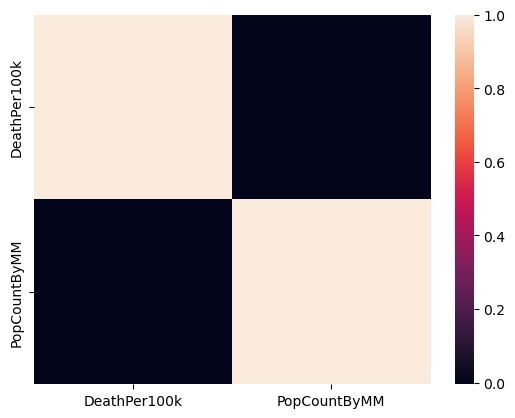

In [257]:
# Taking a look at corr.
sns.heatmap(df_diabetes.corr())